In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train (1).csv')

In [3]:
data.shape

(42000, 785)

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.values[:,1:]

In [6]:
X.shape

(42000, 784)

In [19]:
28*28

784

In [7]:
X.min()

0

In [8]:
X.max()

255

In [10]:
X = X / 255

In [15]:
sample = np.rollaxis(np.rollaxis(X[:200].reshape(20, -1, 28,28), 0, 2), 1, 3).reshape(-1, 20*28)

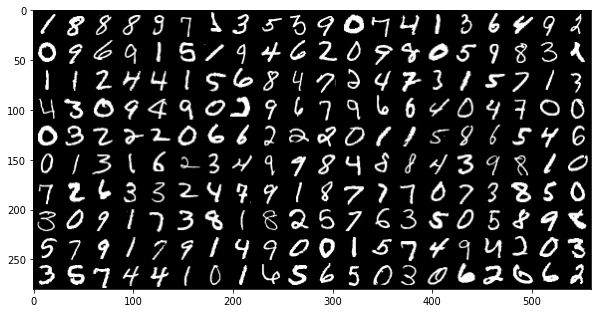

In [18]:
plt.figure(figsize=(10,20))
plt.imshow(sample, cmap='gray')

In [32]:
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(n_components=200)

In [33]:
rbm.fit(X)

BernoulliRBM(n_components=200)

In [34]:
test = X[:40]
regen = list()
for n in range(40):
    regen.append(rbm.gibbs(test[n]))
regen_arr = np.array(regen)

In [35]:
regen_arr = np.array(regen)

In [37]:
sample_regen = np.rollaxis(np.rollaxis(regen_arr[:200].reshape(20, -1, 28,28), 0, 2), 1, 3).reshape(-1, 20*28)

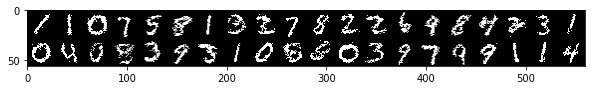

In [38]:
plt.figure(figsize=(10,20))
plt.imshow(sample_regen, cmap='gray')

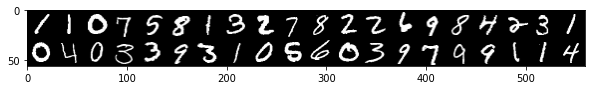

In [39]:
sample_real = np.rollaxis(np.rollaxis(test[:200].reshape(20, -1, 28,28), 0, 2), 1, 3).reshape(-1, 20*28)
plt.figure(figsize=(10,20))
plt.imshow(sample_real, cmap='gray')

In [46]:
arr = np.random.randint(0,100,120).reshape(6,4,5)

In [47]:
arr

array([[[78, 41, 84, 78, 40],
        [40, 48, 51,  9, 16],
        [48, 28,  1, 81, 63],
        [38, 19, 40, 64, 57]],

       [[62, 91,  5, 86,  6],
        [95, 11, 83,  1, 55],
        [62, 37, 29, 61, 96],
        [20, 75, 28, 38, 67]],

       [[74, 24, 89, 21, 55],
        [80, 51, 72, 40,  7],
        [88, 96, 87, 75, 56],
        [40, 68, 19, 24, 58]],

       [[18, 30, 28, 34, 70],
        [77, 12, 76, 79, 90],
        [28, 19, 17, 75, 30],
        [58, 69, 75, 91, 63]],

       [[77,  7, 57, 61, 76],
        [41,  9, 66, 78, 76],
        [62, 66, 77, 23, 69],
        [33, 63, 52, 99, 96]],

       [[66, 85, 23, 99, 24],
        [18, 70, 67, 92, 68],
        [87, 21, 56, 16, 23],
        [26, 56, 95, 17, 80]]])

In [48]:
arr.shape

(6, 4, 5)

In [49]:
np.rollaxis(arr, 1).shape

(4, 6, 5)

In [50]:
np.rollaxis(arr, 2).shape

(5, 6, 4)

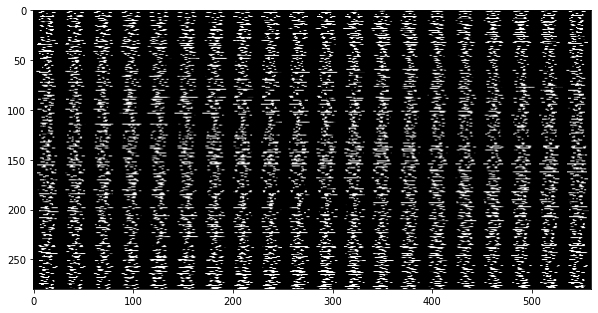

In [51]:
sample = X[:200].reshape(28*10,28*20)
plt.figure(figsize=(10,20))
plt.imshow(sample, cmap='gray')